 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [72]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [11]:
# Reading whale returns
whale = Path('C:/Users/Lucas/Desktop/unit_4_pandas_homework/Resources/whale_returns.csv')
whale_df = pd.read_csv(whale, index_col='Date', parse_dates=True, infer_datetime_format=True)
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [12]:
# Count nulls
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [13]:
# Drop nulls
whale_df = whale_df.dropna().copy()
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [15]:
# Reading algorithmic returns
algo = Path("../unit_4_pandas_homework/Resources/algo_returns.csv")
algo_df = pd.read_csv(algo, index_col='Date', parse_dates=True, infer_datetime_format=True)
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [16]:
# Count nulls
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [17]:
# Drop nulls
algo_df = algo_df.dropna().copy()
algo_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [23]:
# Reading S&P 500 Closing Prices
sp500 = Path("../unit_4_pandas_homework/Resources/sp500_history.csv")
sp500_df = pd.read_csv(sp500, index_col='Date', parse_dates=True, infer_datetime_format=True)
sp500_df['Close'] = sp500_df['Close'].str.replace("$", "") 
sp500_df.head()

C:\Users\Lucas\AppData\Local\Temp\ipykernel_26424\3849098931.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sp500_df['Close'] = sp500_df['Close'].str.replace("$", "")


,Close
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06


In [21]:
# Check Data Types
sp500_df.dtypes

Close    object
dtype: object

In [24]:
# Fix Data Types
sp500_df["Close"] = sp500_df["Close"].astype("float")
sp500_df.dtypes

Close    float64
dtype: object

In [25]:
# Calculate Daily Returns
sp500_daily_returns = sp500_df.pct_change()
sp500_daily_returns.head()

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [28]:
# Drop nulls
sp500_daily_returns = sp500_daily_returns.dropna().copy()
sp500_daily_returns.isnull().sum()

Close    0
dtype: int64

In [29]:
# Rename `Close` Column to be specific to this portfolio.
sp500_daily_returns = sp500_daily_returns.rename(columns={"Close": "S&P 500 Daily Returns"})
sp500_daily_returns.head()

,S&P 500 Daily Returns
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


## Combine Whale, Algorithmic, and S&P 500 Returns

In [30]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
all_portfolio_returns = pd.concat([whale_df, algo_df, sp500_daily_returns], axis='columns', join='inner')
all_portfolio_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500 Daily Returns
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

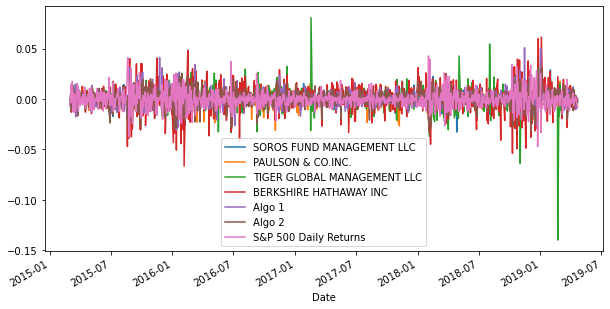

In [42]:
# Plot daily returns of all portfolios
all_portfolio_returns.plot(figsize=(10,5))

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

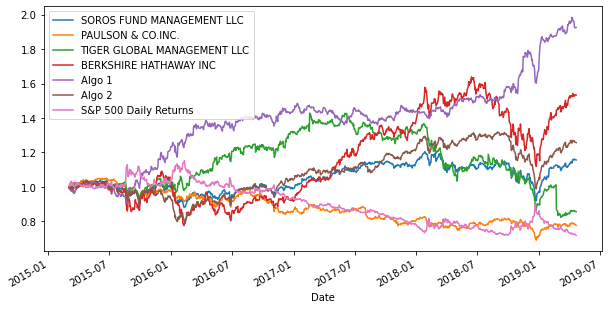

In [40]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + all_portfolio_returns).cumprod()
cumulative_returns.head()
# Plot cumulative returns
cumulative_returns.plot(figsize=(10,5))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

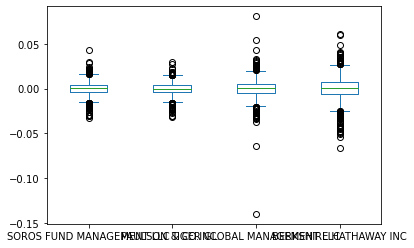

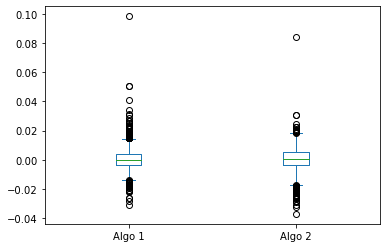

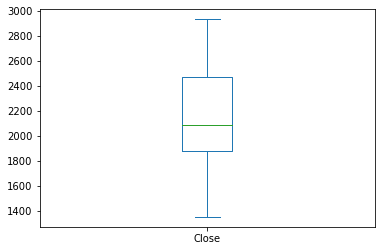

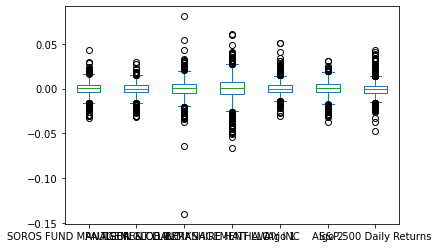

In [49]:
# Box plot to visually show risk
whale_df.plot.box()
algo_df.plot.box()
sp500_df.plot.box()
all_portfolio_returns.plot.box()

### Calculate Standard Deviations

In [59]:
# Calculate the daily standard deviations of all portfolios
whale_std = whale_df.std()
algo_std = algo_df.std()
print(whale_std)
print(algo_std)
all_portfolio_std = all_portfolio_returns.std().sort_values(ascending=False)
print(all_portfolio_std)

SOROS FUND MANAGEMENT LLC      0.007842
PAULSON & CO.INC.              0.006977
TIGER GLOBAL MANAGEMENT LLC    0.010824
BERKSHIRE HATHAWAY INC         0.012831
dtype: float64
Algo 1    0.007988
Algo 2    0.008466
dtype: float64
BERKSHIRE HATHAWAY INC         0.012919
TIGER GLOBAL MANAGEMENT LLC    0.010897
S&P 500 Daily Returns          0.008587
Algo 2                         0.008341
SOROS FUND MANAGEMENT LLC      0.007896
Algo 1                         0.007623
PAULSON & CO.INC.              0.007026
dtype: float64


### Determine which portfolios are riskier than the S&P 500

S&P 500 Daily Returns    0.008135
dtype: float64


<AxesSubplot:ylabel='Frequency'>

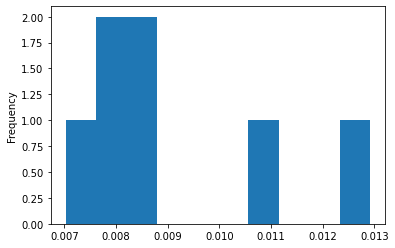

In [62]:
# Calculate  the daily standard deviation of S&P 500
sp500_daily_std = sp500_daily_returns.std()
print(sp500_daily_std)
# Determine which portfolios are riskier than the S&P 500
all_portfolio_std.plot.hist()

### Calculate the Annualized Standard Deviation

In [56]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = all_portfolio_std * np.sqrt(252)
annualized_std.head().sort_values(ascending=False)

BERKSHIRE HATHAWAY INC         0.205079
TIGER GLOBAL MANAGEMENT LLC    0.172989
SOROS FUND MANAGEMENT LLC      0.125348
Algo 1                         0.121006
PAULSON & CO.INC.              0.111527
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

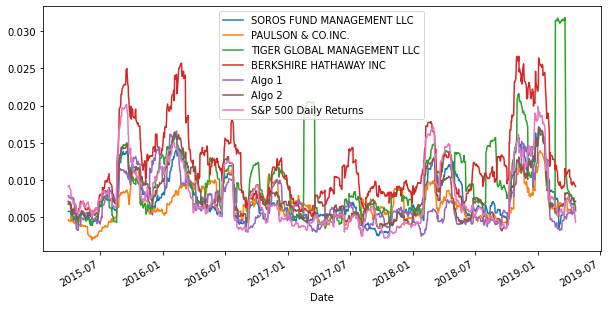

In [68]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
all_portfolio_returns.rolling(window=21).std()
# Plot the rolling standard deviation
all_portfolio_returns.rolling(window=21).std().plot(figsize=(10,5))

### Calculate and plot the correlation

<AxesSubplot:>

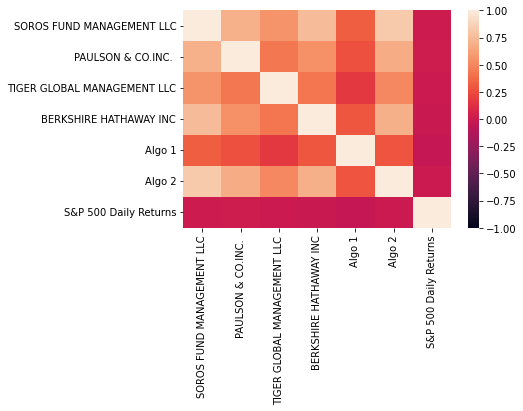

In [73]:
# Calculate the correlation
correlation = all_portfolio_returns.corr()
# Display de correlation matrix
sns.heatmap(correlation, vmin=-1, vmax=1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

-1.5371091324717372e-06
7.373467552840441e-05
-0.020846489408902394


<AxesSubplot:title={'center':'Rolling 60 day Covariance'}, xlabel='Date'>

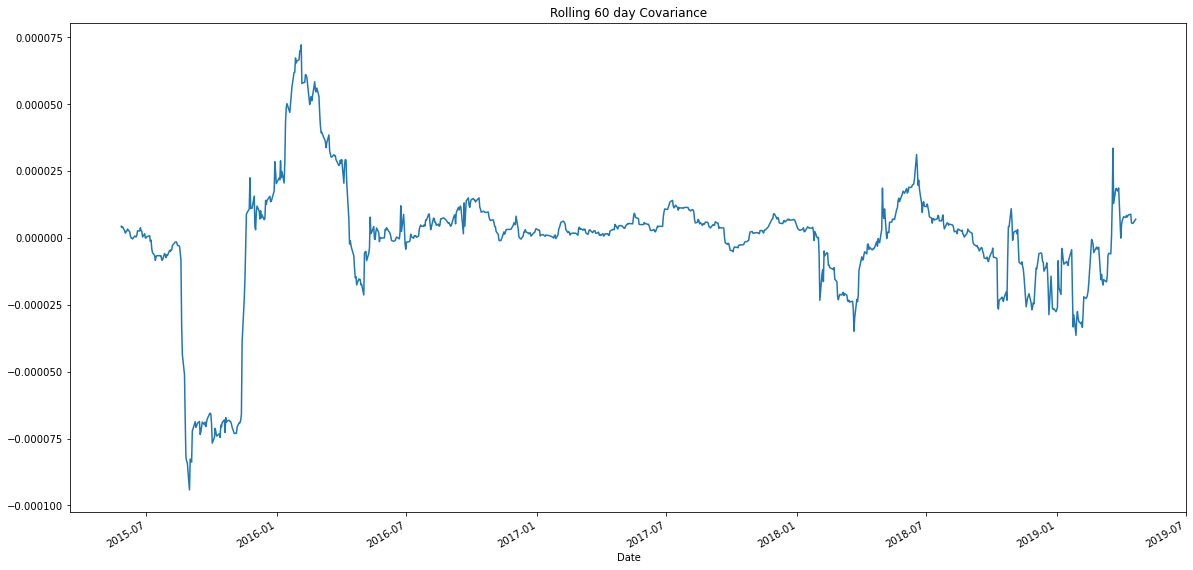

In [82]:
# Calculate covariance of a single portfolio
covariance = all_portfolio_returns['BERKSHIRE HATHAWAY INC'].cov(all_portfolio_returns['S&P 500 Daily Returns'])
print(covariance)
# Calculate variance of S&P 500
variance = all_portfolio_returns['S&P 500 Daily Returns'].var()
print(variance)
# Computing beta
berkshire_beta = covariance / variance
print(berkshire_beta)
# Plot beta trend
rolling_covariance = all_portfolio_returns['BERKSHIRE HATHAWAY INC'].rolling(window=60).cov(all_portfolio_returns['S&P 500 Daily Returns'])
rolling_covariance.plot(figsize=(20,10), title='Rolling 60 day Covariance')

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [ ]:
# Use `ewm` to calculate the rolling window


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [83]:
# Annualized Sharpe Ratios
sharpe_ratios = (all_portfolio_returns.mean() * 252) / (all_portfolio_std * np.sqrt(252))
sharpe_ratios.head()

Algo 1                    1.369589
Algo 2                    0.484334
BERKSHIRE HATHAWAY INC    0.606743
PAULSON & CO.INC.        -0.491422
S&P 500 Daily Returns    -0.518582
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

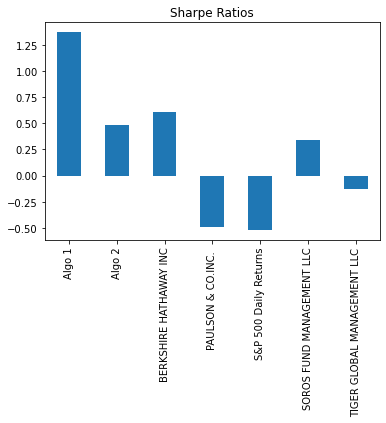

In [84]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot.bar(title='Sharpe Ratios')

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [172]:
# Reading data from 1st stock
mastercard = Path('C:/Users/Lucas/Desktop/unit_4_pandas_homework/Resources/mastercard_returns.csv')
mastercard_df = pd.read_csv(mastercard, index_col='Date', parse_dates=True, infer_datetime_format=True, dayfirst=True)
mastercard_df.head()

,Close
Date,
2018-01-02,151.91
2018-01-03,153.82
2018-01-04,155.81
2018-01-05,159.04
2018-01-08,159.27


In [173]:
# Reading data from 2nd stock
google = Path('C:/Users/Lucas/Desktop/unit_4_pandas_homework/Resources/google_returns.csv')
google_df = pd.read_csv(google, index_col='Date', parse_dates=True, infer_datetime_format=True, dayfirst=True)
google_df.head()

,Close
Date,
2018-01-02,53.25
2018-01-03,54.12
2018-01-04,54.32
2018-01-05,55.11
2018-01-08,55.35


In [174]:
# Reading data from 3rd stock
walmart = Path('C:/Users/Lucas/Desktop/unit_4_pandas_homework/Resources/walmart_returns.csv')
walmart_df = pd.read_csv(walmart, index_col='Date', parse_dates=True, infer_datetime_format=True, dayfirst=True)
walmart_df.head()

,Close
Date,
2018-01-02,98.59
2018-01-03,99.45
2018-01-04,99.54
2018-01-05,100.13
2018-01-08,101.61


In [175]:
# Combine all stocks in a single DataFrame
select_stocks_returns = pd.concat([mastercard_df, google_df, walmart_df], axis='columns', join='inner')
select_stocks_returns.head()

,Close,Close,Close
Date,,,
2018-01-02,151.91,53.25,98.59
2018-01-03,153.82,54.12,99.45
2018-01-04,155.81,54.32,99.54
2018-01-05,159.04,55.11,100.13
2018-01-08,159.27,55.35,101.61


In [176]:
# Reset Date index
select_stocks_daily_returns.index = pd.to_datetime(select_stocks_daily_returns.index)

select_stocks_returns.head()

,Close,Close,Close
Date,,,
2018-01-02,151.91,53.25,98.59
2018-01-03,153.82,54.12,99.45
2018-01-04,155.81,54.32,99.54
2018-01-05,159.04,55.11,100.13
2018-01-08,159.27,55.35,101.61


In [177]:
# Reorganize portfolio data by having a column per symbol
select_stocks_returns.columns = ['Mastercard', 'Google', 'Walmart']
select_stocks_returns.head()

,Mastercard,Google,Walmart
Date,,,
2018-01-02,151.91,53.25,98.59
2018-01-03,153.82,54.12,99.45
2018-01-04,155.81,54.32,99.54
2018-01-05,159.04,55.11,100.13
2018-01-08,159.27,55.35,101.61


In [178]:
# Calculate daily returns
select_stocks_daily_returns = select_stocks_returns.pct_change()
# Drop NAs
select_stocks_daily_returns = select_stocks_daily_returns.dropna().copy()
# Display sample data
select_stocks_daily_returns.head()

,Mastercard,Google,Walmart
Date,,,
2018-01-03,0.012573,0.016338,0.008723
2018-01-04,0.012937,0.003695,0.000905
2018-01-05,0.020730,0.014543,0.005927
2018-01-08,0.001446,0.004355,0.014781
2018-01-09,0.001444,-0.000723,-0.012007


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [179]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
my_portfolio_returns = select_stocks_daily_returns.dot(weights)
# Display sample data
my_portfolio_returns.head()

Date
2018-01-03    0.012545
2018-01-04    0.005846
2018-01-05    0.013734
2018-01-08    0.006861
2018-01-09   -0.003762
dtype: float64

In [180]:
select_stocks_daily_returns.head()

,Mastercard,Google,Walmart
Date,,,
2018-01-03,0.012573,0.016338,0.008723
2018-01-04,0.012937,0.003695,0.000905
2018-01-05,0.020730,0.014543,0.005927
2018-01-08,0.001446,0.004355,0.014781
2018-01-09,0.001444,-0.000723,-0.012007


In [181]:
all_portfolio_returns.tail()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500 Daily Returns
Date,,,,,,,
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,-0.001011
2019-04-22,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,-0.008764


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [182]:
# Join your returns DataFrame to the original returns DataFrame
combined_portfolio_returns = pd.concat([select_stocks_daily_returns, all_portfolio_returns],axis='columns', join='inner')
combined_portfolio_returns.head(10)

,Mastercard,Google,Walmart,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500 Daily Returns
Date,,,,,,,,,,
2018-01-03,0.012573,0.016338,0.008723,0.004658,0.000027,0.001979,0.005676,-0.000890,0.008175,-0.004012
2018-01-04,0.012937,0.003695,0.000905,-0.000914,0.004196,0.010743,0.004065,-0.000914,0.004294,-0.006985
2018-01-05,0.020730,0.014543,0.005927,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405,-0.001660
2018-01-08,0.001446,0.004355,0.014781,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,-0.001301
2018-01-09,0.001444,-0.000723,-0.012007,-0.001028,0.000872,0.001789,0.000708,-0.001004,-0.002091,0.001113
2018-01-10,0.002257,-0.003254,-0.007172,-0.002753,-0.002290,-0.005720,-0.004781,0.003567,-0.000224,-0.006984
2018-01-11,0.006631,0.002721,0.003512,0.010541,0.011773,-0.002063,0.017662,-0.005614,0.016898,-0.006704
2018-01-12,0.008762,0.015014,0.008498,0.002590,0.002418,0.003807,0.002594,-0.000875,0.002411,0.003537
2018-01-16,-0.000246,-0.000356,-0.001784,-0.005126,-0.005553,0.009646,-0.011962,0.003931,-0.009533,-0.009327


In [183]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
combined_portfolio_returns = combined_portfolio_returns.dropna().copy()
combined_portfolio_returns.isnull().sum()

Mastercard                     0
Google                         0
Walmart                        0
SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
Algo 1                         0
Algo 2                         0
S&P 500 Daily Returns          0
dtype: int64

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [184]:
# Calculate the annualized `std`
combined_std = combined_portfolio_returns.std()
combined_annualized_std = combined_std * np.sqrt(252)
combined_annualized_std.head().sort_values(ascending=False)

Mastercard                   0.284990
Google                       0.281862
Walmart                      0.240858
SOROS FUND MANAGEMENT LLC    0.157898
PAULSON & CO.INC.            0.118081
dtype: float64

### Calculate and plot rolling `std` with 21-day window

In [ ]:
# Calculate rolling standard deviation

# Plot rolling standard deviation


### Calculate and plot the correlation

In [ ]:
# Calculate and plot the correlation


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [ ]:
# Calculate and plot Beta


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Calculate Annualized Sharpe Ratios


In [ ]:
# Visualize the sharpe ratios as a bar plot


### How does your portfolio do?

Write your answer here!